In [2]:
import os
import pandas as pd
file_path = '~/market_volatility_pred/data/IT_sector.csv'
file_path = os.path.expanduser(file_path)
df = pd.read_csv(file_path, skipinitialspace=True)

In [3]:

df.columns = df.columns.str.strip()  # Remove spaces from column names
print(df.isna().sum())
# Remove spaces from string data in the entire DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.fillna(0, inplace=True)  # Fill NaN values with 0

Date             0
Open             0
High             0
Low              0
Close            0
Shares Traded    2
Turnover (Cr)    2
dtype: int64


/tmp/ipykernel_5396/455190210.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:
df['returns'] = df['Close'].pct_change()
df['returns']=df['returns']*100
df['volatility'] = df['returns'].rolling(window=30).std()   #To get the annualized volatility
df['volatility'].fillna(0, inplace=True)

/tmp/ipykernel_5396/2965855089.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['volatility'].fillna(0, inplace=True)


In [5]:
df.head(31)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr),returns,volatility
0,01-DEC-2017,11123.60,11180.40,10930.95,10948.50,15744634.0,766.04,NaN,0.00000
1,04-DEC-2017,11007.95,11138.10,10901.10,11081.65,28758345.0,1619.53,1.216148,0.00000
2,05-DEC-2017,11079.35,11121.85,11005.90,11025.40,22390897.0,1209.54,-0.507596,0.00000
3,06-DEC-2017,11024.55,11099.05,11006.20,11074.90,26426388.0,1170.90,0.448963,0.00000
4,07-DEC-2017,11075.55,11178.80,11057.45,11163.45,25529596.0,1338.80,0.799556,0.00000
5,08-DEC-2017,11189.80,11249.30,11159.75,11173.40,18936548.0,1021.67,0.089130,0.00000
6,11-DEC-2017,11178.90,11343.15,11170.45,11324.00,14923112.0,856.25,1.347844,0.00000
7,12-DEC-2017,11327.70,11341.75,11251.70,11272.45,19365806.0,1298.25,-0.455228,0.00000
8,13-DEC-2017,11257.05,11328.75,11210.70,11251.70,18858996.0,1362.11,-0.184077,0.00000
9,14-DEC-2017,11257.95,11307.90,11174.65,11275.40,20290720.0,1712.66,0.210635,0.00000


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


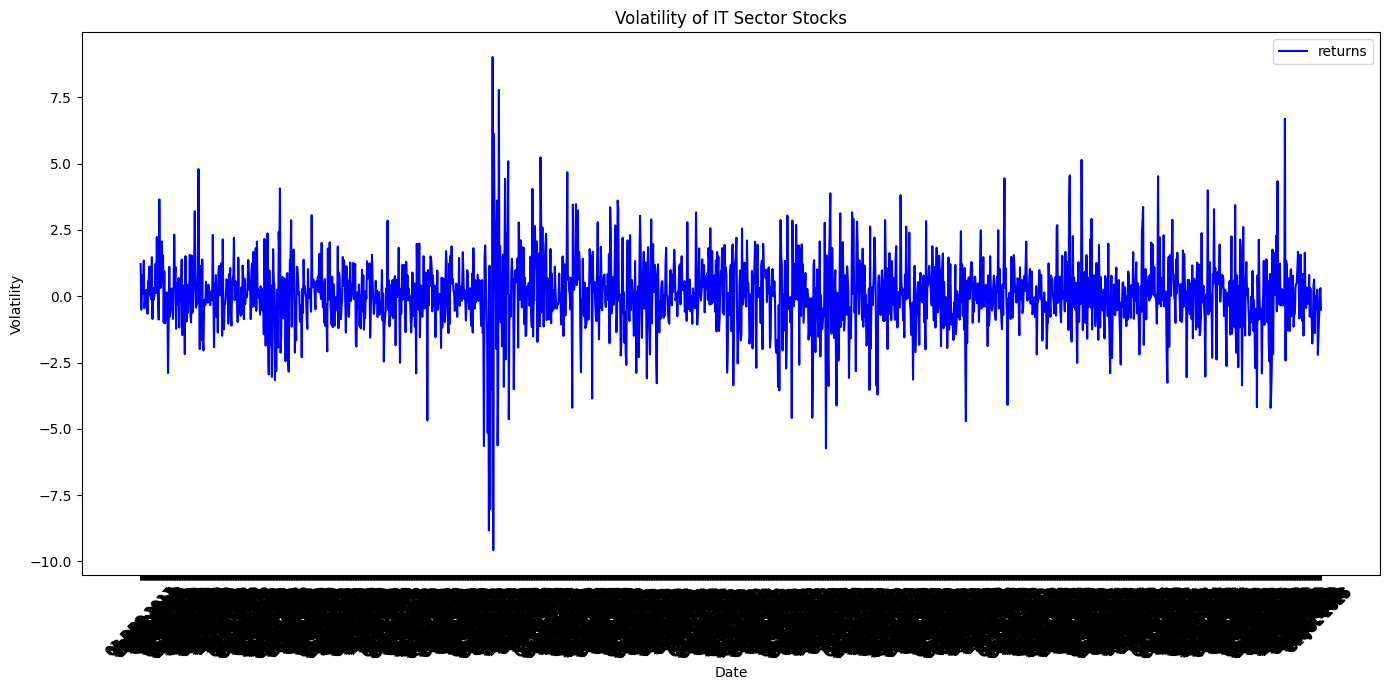

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['returns'], label='returns', color='blue')
plt.title('Volatility of IT Sector Stocks')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
print(df['returns'].isna().sum())  # Check for NaN values in returns

1


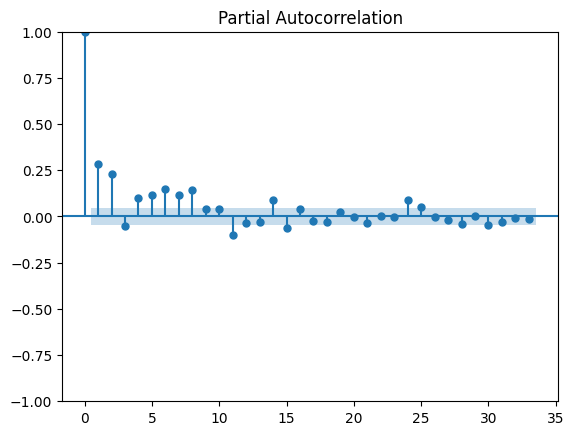

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf((df['returns']**2).dropna())
plt.show()

We conclude that GARCH(2,2) will be suitable
but the P>|t| tells take p=1 and   q=1

In [10]:
train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']

In [11]:
%pip install arch
from arch import arch_model
model = arch_model(train_df['returns'].dropna(), vol="EGARCH", p=3, q=3, mean='constant', dist="t")

Note: you may need to restart the kernel to use updated packages.


In [12]:
res = model.fit(update_freq=5) # update_freq controls the frequency of progress updates
print(res.summary())

Iteration:      5,   Func. Count:     64,   Neg. LLF: 3066.100025539046
Iteration:     10,   Func. Count:    121,   Neg. LLF: 2047.4101015674144
Iteration:     15,   Func. Count:    175,   Neg. LLF: 2044.2145050214715
Iteration:     20,   Func. Count:    225,   Neg. LLF: 2044.2099732044192
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2044.2099732044192
            Iterations: 21
            Function evaluations: 234
            Gradient evaluations: 21
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2044.21
Distribution:      Standardized Student's t   AIC:                           4106.42
Method:                  Maximum Likelihood   BIC:                       

<Axes: title={'center': 'Standardized Residuals'}>

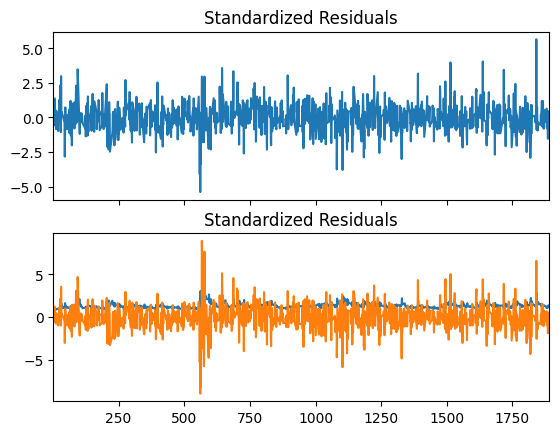

In [13]:
res.plot()
res.resid.plot(title="Standardized Residuals")  #Parameter Diagnostics & Residual Checks

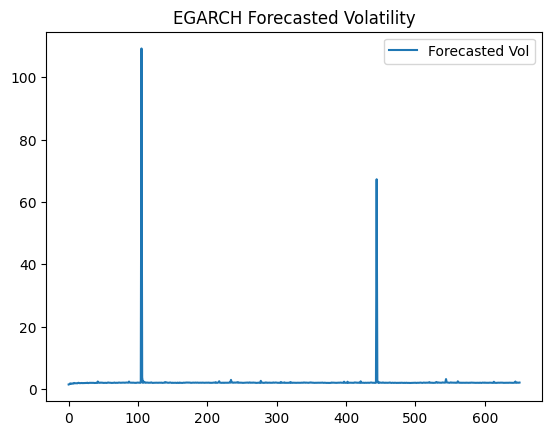

In [14]:
fcast = res.forecast(horizon=len(test_df), method="simulation") #"simulation" or "bootstrap": Use these for multi-step forecasts with models that don't support analytic solutions.
vol_pred = fcast.variance.values[-1, :]
plt.plot(vol_pred, label="Forecasted Vol")
plt.title("EGARCH Forecasted Volatility")
plt.legend()
plt.show()

In [15]:
# df = df.reset_index(drop=True)

# # Split into train and test sets
# train_df = df[df['Date'] < '2024-01-01']
# test_df = df[df['Date'] >= '2024-01-01']

# n_train = len(train_df)
# n_test = len(test_df)

# # Forecast from the end of training set for the length of the test set
# fcast = res.forecast(start=n_train, horizon=1)

# # Extract the forecasted variance for the test set period
# vol_pred = fcast.variance.iloc[n_train:n_train + n_test, 0]

In [16]:
len(test_df)

651

In [17]:
len(vol_pred)

651

In [18]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Align indices if needed
vol_pred = pd.Series(vol_pred).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Realized variance (squared returns)
realized_var = (test_df['returns'])

# Mean Squared Error between predicted and realized variance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(realized_var, vol_pred.values.flatten())
print("MSE between predicted and realized variance:", mse)

MSE between predicted and realized variance: 31.350724013560157


<h2>Rolling forecasting method </h2>

In [20]:
rolling_predictions = []
test_size = len(test_df) # Adjusted to avoid empty train set in the first iteration
for i in range(test_size):
    train = df.iloc[:-(test_size-i)]

    # print(f"Iteration {i}: train shape = {train.shape}")
    # print(f"Non-NaN returns count: {train['returns'].dropna().shape[0]}")
    # print(train['returns'].head())
    
    # if train['returns'].dropna().empty:
    #     raise ValueError("No data to fit the model. Check your train['returns'] values.")
    model = arch_model(train['returns'].dropna(), vol="GARCH", p=3, q=1, mean='constant', dist="t")
    res = model.fit(disp="off")
    fcast = res.forecast(horizon=1)
    rolling_predictions.append(fcast.variance.values[-1, :][0])

In [21]:
rolling_predictions=pd.Series(rolling_predictions, index=test_df.index)

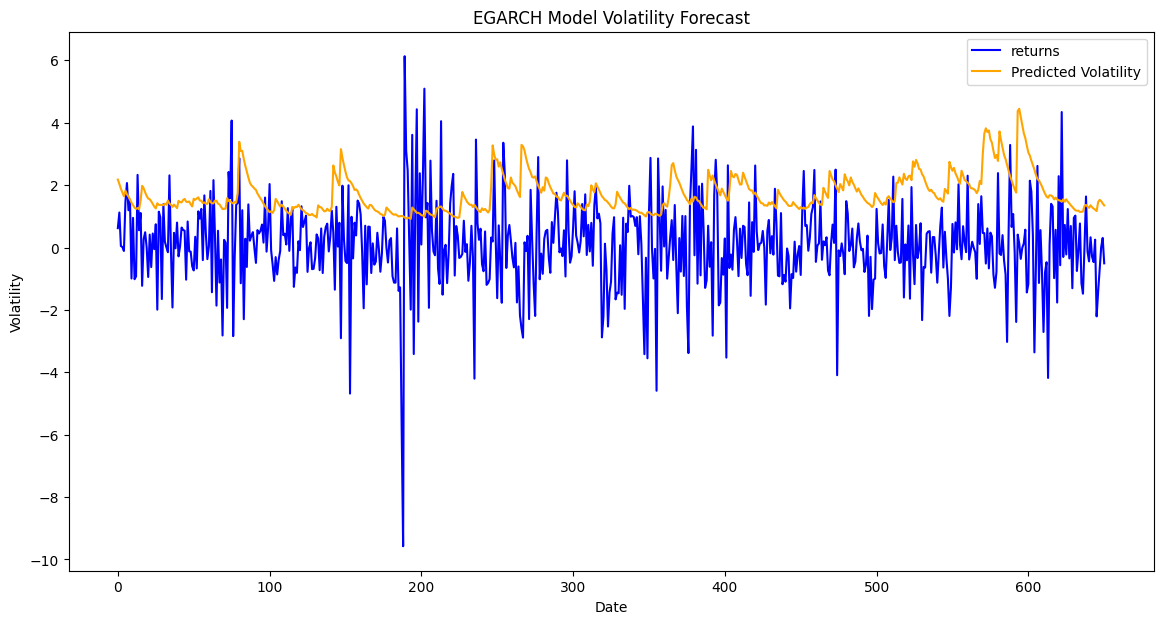

In [22]:
plt.figure(figsize=(14, 7))
true, = plt.plot(test_df['returns'], label='returns', color='blue')
pred, = plt.plot(rolling_predictions, label='Predicted Volatility', color='orange')
plt.title('EGARCH Model Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(handles=[true, pred])
plt.show()

<h2> Auto Armima method </h2>


In [23]:
%pip install statsmodels
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install scipy
%pip install pyramid-arima

Note: you may need to restart the kernel to use updated packages.
  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pyramid-arima' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pyramid-arima'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [363 lines of output]
      Partial import of pyramid during the build process.
      Requirements: ['Cython>=0.23', 'numpy>=1.10', 'scipy>=0.9', 'scikit-learn>=0.17', 'pandas>=0.19', 'statsmodels>=0.9.0']
      Adding extra setuptools args
      /tm

In [25]:
# In a notebook cell or terminal:
%pip install --upgrade numpy pmdarima

Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install --upgrade scipy statsmodels

from pmdarima import auto_arima
model = auto_arima(train_df, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_df)

forecast = model.predict(n_periods=len(test_df))
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['returns'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test_df, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

Note: you may need to restart the kernel to use updated packages.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

<h2> LSTM (RNN) Model for volatility prediction </h2>

In [ ]:
from tenserflow import keras